## Final Project Submission

Please fill out:
* Student name: Allan Jawuoro
* Student pace: Full-time Hybrid
* Scheduled project review date/time: 
* Instructor name: Diana Mongina
* Blog post URL:



Project Overview
For this project, you will use data cleaning, imputation, analysis, and visualization to generate
insights for a business stakeholder.

Business Problem
Your company is expanding in to new industries to diversify its portfolio. Specifically, 
they are interested in purchasing and operating airplanes for commercial and private enterprises,
but do not know anything about the potential risks of aircraft. 
You are charged with determining which aircraft are the lowest risk for the company to 
start this new business endeavor. You must then translate your findings into actionable insights
that the head of the new aviation division can use to help decide which aircraft to purchase.


In [65]:
#Import necessary libraries and set matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [66]:
#Load in the data
df = pd.read_csv('AviationData.csv', encoding='latin-1', low_memory = False)
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


Check for the dataframes information by .dtypes and .describe

In [67]:
#chek for the data type
df.dtypes

Event.Id                   object
Investigation.Type         object
Accident.Number            object
Event.Date                 object
Location                   object
Country                    object
Latitude                   object
Longitude                  object
Airport.Code               object
Airport.Name               object
Injury.Severity            object
Aircraft.damage            object
Aircraft.Category          object
Registration.Number        object
Make                       object
Model                      object
Amateur.Built              object
Number.of.Engines         float64
Engine.Type                object
FAR.Description            object
Schedule                   object
Purpose.of.flight          object
Air.carrier                object
Total.Fatal.Injuries      float64
Total.Serious.Injuries    float64
Total.Minor.Injuries      float64
Total.Uninjured           float64
Weather.Condition          object
Broad.phase.of.flight      object
Report.Status 

In [68]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


First get a copy of the dataframe where the country is USA and purpose of flight is business. 
The presumptions are;
1.The company wants to set up its operations in the USA, and not to operate abroad. 
2.The company is setting up for business operations, thus we only consider for 'Business' and not 'Personal'

In [69]:
# Filter the data by country and purpose of flight
df = df[(df['Country'] == 'United States') & (df['Purpose.of.flight'] == 'Business')].copy()
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,HANOVER,...,Business,NaN,0.0,0.0,0.0,2.0,IMC,Landing,Probable Cause,01-01-1982
25,20020917X01905,Accident,DCA82AA008,1982-01-03,"ASHLAND, VA",United States,NaN,NaN,NaN,HANOVER COUNTY,...,Business,NaN,8.0,0.0,0.0,0.0,IMC,Approach,Probable Cause,03-01-1983
37,20020917X02304,Accident,LAX82FUM06,1982-01-05,"RAMONA, CA",United States,NaN,NaN,L39,RAMONA,...,Business,NaN,3.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,05-01-1983
40,20020917X01764,Incident,ATL82IA029,1982-01-05,"PENSACOLA, FL",United States,NaN,NaN,NaN,NaN,...,Business,NaN,0.0,0.0,0.0,1.0,VMC,Cruise,Probable Cause,05-01-1983
41,20020917X01993,Accident,FTW82DA037,1982-01-05,"LONOKE, AR",United States,NaN,NaN,NaN,NaN,...,Business,NaN,0.0,1.0,0.0,1.0,VMC,Descent,Probable Cause,05-01-1983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88765,20221109106270,Accident,CEN23FA031,2022-11-09,"Bignell, NE",United States,041453N,1003648W,LBF,NORTH PLATTE RGNL/LEE BIRD FLD,...,Business,NaN,2.0,0.0,0.0,0.0,IMC,NaN,NaN,18-11-2022
88786,20221115106296,Accident,CEN23LA037,2022-11-15,"Pewaukee, WI",United States,043228N,0881413W,UES,WAUKESHA COUNTY,...,Business,UAS TRANSERVICES INC,0.0,2.0,0.0,1.0,IMC,NaN,NaN,09-12-2022
88804,20221121106337,Accident,ANC23LA006,2022-11-20,"Bethel, AK",United States,604243N,1614111W,NaN,NaN,...,Business,YR-AIRCRAFT LEASING LLC,0.0,0.0,0.0,7.0,VMC,NaN,NaN,19-12-2022
88834,20221130106387,Accident,CEN23LA056,2022-11-29,"Batesville, AR",United States,354334N,0913851W,BVX,Batesville Regional Airport,...,Business,Creamer Pilot Services LLC,0.0,2.0,0.0,6.0,IMC,NaN,NaN,14-12-2022


Check for null values in the entire dataframe.
Drop the 'not of much importance' to our analysis
columns such as longitude, latitude, airport code/name, FAR description and schedule. 
Columns that does not directly impact the risk of an aircraft

In [70]:
#check for null in the entire dataframe
df.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Latitude                  2969
Longitude                 2969
Airport.Code              1768
Airport.Name              1607
Injury.Severity              1
Aircraft.damage             85
Aircraft.Category         2959
Registration.Number          1
Make                         0
Model                        1
Amateur.Built                0
Number.of.Engines           75
Engine.Type                 99
FAR.Description           2958
Schedule                  3763
Purpose.of.flight            0
Air.carrier               3485
Total.Fatal.Injuries       325
Total.Serious.Injuries     389
Total.Minor.Injuries       368
Total.Uninjured            159
Weather.Condition           21
Broad.phase.of.flight      497
Report.Status               81
Publication.Date           986
dtype: int64

In [71]:
#drop some columns, those not needed for our analysis
df.drop(columns = ['Airport.Name', 'Registration.Number', 'FAR.Description',
                  'Schedule', 'Air.carrier', 'Report.Status',  'Broad.phase.of.flight', 'Amateur.Built', 'Publication.Date'], inplace = True)

In [72]:
df

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Injury.Severity,...,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
8,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,Non-Fatal,...,Cessna,401B,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC
25,20020917X01905,Accident,DCA82AA008,1982-01-03,"ASHLAND, VA",United States,NaN,NaN,NaN,Fatal(8),...,Cessna,414A,2.0,Reciprocating,Business,8.0,0.0,0.0,0.0,IMC
37,20020917X02304,Accident,LAX82FUM06,1982-01-05,"RAMONA, CA",United States,NaN,NaN,L39,Fatal(3),...,Navion,A,1.0,Reciprocating,Business,3.0,0.0,0.0,0.0,IMC
40,20020917X01764,Incident,ATL82IA029,1982-01-05,"PENSACOLA, FL",United States,NaN,NaN,NaN,Incident,...,Rockwell,114,1.0,Reciprocating,Business,0.0,0.0,0.0,1.0,VMC
41,20020917X01993,Accident,FTW82DA037,1982-01-05,"LONOKE, AR",United States,NaN,NaN,NaN,Non-Fatal,...,Piper,PA-24-250,1.0,Reciprocating,Business,0.0,1.0,0.0,1.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88765,20221109106270,Accident,CEN23FA031,2022-11-09,"Bignell, NE",United States,041453N,1003648W,LBF,Fatal,...,PIPER,PA46-500TP,1.0,NaN,Business,2.0,0.0,0.0,0.0,IMC
88786,20221115106296,Accident,CEN23LA037,2022-11-15,"Pewaukee, WI",United States,043228N,0881413W,UES,Minor,...,FAIRCHILD,SA227-AT,2.0,NaN,Business,0.0,2.0,0.0,1.0,IMC
88804,20221121106337,Accident,ANC23LA006,2022-11-20,"Bethel, AK",United States,604243N,1614111W,NaN,Non-Fatal,...,CESSNA,207,1.0,NaN,Business,0.0,0.0,0.0,7.0,VMC
88834,20221130106387,Accident,CEN23LA056,2022-11-29,"Batesville, AR",United States,354334N,0913851W,BVX,Minor,...,LEARJET INC,45,2.0,NaN,Business,0.0,2.0,0.0,6.0,IMC


Now we are at the very surface of our scope. United States -- Business.
The risk of an aircraft with the available data will first be determined by involvement in accident and incidents. 
we can look at accidents and incidents separately.

In [73]:
#Filter by accidents
df_Accidents = df[df['Investigation.Type'] == 'Accident'].copy()
df_Incidents = df[df['Investigation.Type'] == 'Incident'].copy()
df_Accidents.reset_index(drop = True, inplace = True)
df_Accidents

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Injury.Severity,...,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
0,20020909X01561,Accident,NYC82DA015,1982-01-01,"EAST HANOVER, NJ",United States,NaN,NaN,N58,Non-Fatal,...,Cessna,401B,2.0,Reciprocating,Business,0.0,0.0,0.0,2.0,IMC
1,20020917X01905,Accident,DCA82AA008,1982-01-03,"ASHLAND, VA",United States,NaN,NaN,NaN,Fatal(8),...,Cessna,414A,2.0,Reciprocating,Business,8.0,0.0,0.0,0.0,IMC
2,20020917X02304,Accident,LAX82FUM06,1982-01-05,"RAMONA, CA",United States,NaN,NaN,L39,Fatal(3),...,Navion,A,1.0,Reciprocating,Business,3.0,0.0,0.0,0.0,IMC
3,20020917X01993,Accident,FTW82DA037,1982-01-05,"LONOKE, AR",United States,NaN,NaN,NaN,Non-Fatal,...,Piper,PA-24-250,1.0,Reciprocating,Business,0.0,1.0,0.0,1.0,VMC
4,20020917X02157,Accident,LAX82DA039,1982-01-06,"MAMMOTH LAKES, CA",United States,NaN,NaN,MMH,Non-Fatal,...,Aerospatiale,SA-316B,1.0,Turbo Shaft,Business,0.0,0.0,0.0,6.0,VMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,20221109106270,Accident,CEN23FA031,2022-11-09,"Bignell, NE",United States,041453N,1003648W,LBF,Fatal,...,PIPER,PA46-500TP,1.0,NaN,Business,2.0,0.0,0.0,0.0,IMC
3740,20221115106296,Accident,CEN23LA037,2022-11-15,"Pewaukee, WI",United States,043228N,0881413W,UES,Minor,...,FAIRCHILD,SA227-AT,2.0,NaN,Business,0.0,2.0,0.0,1.0,IMC
3741,20221121106337,Accident,ANC23LA006,2022-11-20,"Bethel, AK",United States,604243N,1614111W,NaN,Non-Fatal,...,CESSNA,207,1.0,NaN,Business,0.0,0.0,0.0,7.0,VMC
3742,20221130106387,Accident,CEN23LA056,2022-11-29,"Batesville, AR",United States,354334N,0913851W,BVX,Minor,...,LEARJET INC,45,2.0,NaN,Business,0.0,2.0,0.0,6.0,IMC


At this point, we have dataframe, df_Accidents, for countries = USA, purpose = Business and investigation type for accidents and incidents, separately. 
Next we look at the types of aircrafts in the df_Accidents dataframe.
Check for null values in the new data frame.

In [74]:
df_Accidents.info() # The non-Null count shows that we have missing data in most columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3744 entries, 0 to 3743
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Event.Id                3744 non-null   object 
 1   Investigation.Type      3744 non-null   object 
 2   Accident.Number         3744 non-null   object 
 3   Event.Date              3744 non-null   object 
 4   Location                3744 non-null   object 
 5   Country                 3744 non-null   object 
 6   Latitude                845 non-null    object 
 7   Longitude               845 non-null    object 
 8   Airport.Code            2008 non-null   object 
 9   Injury.Severity         3743 non-null   object 
 10  Aircraft.damage         3689 non-null   object 
 11  Aircraft.Category       858 non-null    object 
 12  Make                    3744 non-null   object 
 13  Model                   3743 non-null   object 
 14  Number.of.Engines       3673 non-null   

In [75]:
#Check for the nulls
df_Accidents.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Latitude                  2899
Longitude                 2899
Airport.Code              1736
Injury.Severity              1
Aircraft.damage             55
Aircraft.Category         2886
Make                         0
Model                        1
Number.of.Engines           71
Engine.Type                 95
Purpose.of.flight            0
Total.Fatal.Injuries       310
Total.Serious.Injuries     374
Total.Minor.Injuries       353
Total.Uninjured            159
Weather.Condition           20
dtype: int64

In [76]:
# For categorical missing rows, fill in with the mode of that column
mode = df_Accidents['Injury.Severity'].mode()[0]
mode

'Non-Fatal'

In [77]:
# Fill in the null values with the mode
df_Accidents['Injury.Severity'] = df_Accidents['Injury.Severity'].fillna(mode)

In [78]:
#Check for the null after filling
df_Accidents['Injury.Severity'].isna().sum()

0

In [79]:
#use mode to fill
mode = df_Accidents['Aircraft.damage'].mode()[0]
df_Accidents['Aircraft.damage'] = df_Accidents['Aircraft.damage'].fillna(mode)

In [80]:
#Use the mode to fill
mode = df_Accidents['Model'].mode()[0]
df_Accidents['Model'] = df_Accidents['Model'].fillna(mode)

In [81]:
#Fill in the nulls in Number.of.Engines with mode 
mode_4 = df_Accidents ['Number.of.Engines'].mode()[0]
df_Accidents ['Number.of.Engines'] = df_Accidents ['Number.of.Engines'].fillna(mode_4)

In [82]:
#get the mode of the Engine.Type column
mode = df_Accidents ['Engine.Type'].mode()[0]
#fill the null with the mode
df_Accidents ['Engine.Type'] = df_Accidents ['Engine.Type'].fillna(mode)
#Check for null
df_Accidents['Engine.Type'].isna().sum()

0

In [83]:
df_Accidents.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Latitude                  2899
Longitude                 2899
Airport.Code              1736
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category         2886
Make                         0
Model                        0
Number.of.Engines            0
Engine.Type                  0
Purpose.of.flight            0
Total.Fatal.Injuries       310
Total.Serious.Injuries     374
Total.Minor.Injuries       353
Total.Uninjured            159
Weather.Condition           20
dtype: int64

Find the data types of the numerical columns. 
Replace the NaN with the mean of the columns.

In [84]:
# Check for the data types
print([df_Accidents['Total.Fatal.Injuries'].dtype])
print([df_Accidents['Total.Serious.Injuries'].dtype])
print([df_Accidents['Total.Minor.Injuries'].dtype])
print([df_Accidents['Total.Uninjured'].dtype])

[dtype('float64')]
[dtype('float64')]
[dtype('float64')]
[dtype('float64')]


In [85]:
# Get the aggregate means
mean = df_Accidents['Total.Fatal.Injuries'].mean()
mean_1 = df_Accidents['Total.Serious.Injuries'].mean()
mean_2 = df_Accidents['Total.Minor.Injuries'].mean()
mean_3 = df_Accidents['Total.Uninjured'].mean()

In [86]:
# Fill in the mean for the numerical columns with nulls
df_Accidents['Total.Fatal.Injuries'] = df_Accidents['Total.Fatal.Injuries'].fillna(mean)
df_Accidents['Total.Serious.Injuries'] = df_Accidents['Total.Serious.Injuries'].fillna(mean_1)
df_Accidents['Total.Minor.Injuries'] = df_Accidents['Total.Minor.Injuries'].fillna(mean_2)
df_Accidents['Total.Uninjured'] = df_Accidents['Total.Uninjured'].fillna(mean_3)

In [87]:
#Check for the nulls
df_Accidents.isna().sum()

Event.Id                     0
Investigation.Type           0
Accident.Number              0
Event.Date                   0
Location                     0
Country                      0
Latitude                  2899
Longitude                 2899
Airport.Code              1736
Injury.Severity              0
Aircraft.damage              0
Aircraft.Category         2886
Make                         0
Model                        0
Number.of.Engines            0
Engine.Type                  0
Purpose.of.flight            0
Total.Fatal.Injuries         0
Total.Serious.Injuries       0
Total.Minor.Injuries         0
Total.Uninjured              0
Weather.Condition           20
dtype: int64

In [88]:
#Value counts
df_Accidents['Aircraft.Category'].value_counts()

Airplane      719
Helicopter    109
Balloon        27
Glider          2
Gyrocraft       1
Name: Aircraft.Category, dtype: int64

In [89]:
# confirm
df_Accidents['Aircraft.Category'].isna().value_counts()

True     2886
False     858
Name: Aircraft.Category, dtype: int64

By checking for the counts of null values, most of the aircraft category elements are missing. 
Considerations: This is a categorical data and imputing with the mode of that column would suffice. 
However, imputing at this level would result to analytical erros for two reasons
1. the missing data is much more than the avail data and 
2. Each aircraft category, generally has its sub-categories, ie the make of the aircraft. As per the data, the category could be missing but the sub-category, ie, the make of the aircraft is provided. 
Thus replace the NaN in the category column with 'mode'.
Now we have all the data cleaned and ready for analysis.

In [90]:
# Compute the mode
mode = df_Accidents['Aircraft.Category'].mode()[0]
mode
# fill in
df_Accidents['Aircraft.Category'] = df_Accidents['Aircraft.Category'].fillna(mode)
df_Accidents['Aircraft.Category'].isna().sum()
df_Accidents['Aircraft.Category'].value_counts()

Airplane      3605
Helicopter     109
Balloon         27
Glider           2
Gyrocraft        1
Name: Aircraft.Category, dtype: int64

In [91]:
# Check the shape
df_Accidents.shape

(3744, 22)

In [92]:
# set all elements in the 'Make' column as lower case
df_Accidents['Make'] = df_Accidents['Make'].str.lower()
df_Accidents['Make'].value_counts().head(10)

cessna          1278
piper            773
beech            460
bell             145
mooney            95
hughes            77
bellanca          56
robinson          55
de havilland      38
maule             30
Name: Make, dtype: int64

In [93]:
# Create replacement list for the above
replacements = {
    'cessna': 'Cessna',
    'piper': 'Piper',
    'beech': 'Beech',
    'other notables': 'Other Notables',
    'robinson': 'Robinson',
    'robinson helicopter company': 'Robinson',
    'cirrus design corp': 'Cirrus',
    'bell': 'Bell',
    'cameron balloons': 'Cameron Balloons',
    'bell helicopter': 'Bell',
    'robinson helicopter': 'Robinson',
    'dehavilland': 'De Havilland',
    'mooney': 'Mooney',
    'raytheon': 'Raytheon',
    'cirrus': 'Cirrus',
    'aero commander': 'Aero Commander',
    'douglas': 'Douglas',
    'hughes': 'Hughes',
    'raytheon aircraft company': 'Raytheon',
    'enstrom': 'Enstrom',
    'eurocopter': 'Eurocopter',
    'grumman': 'Grumman',
    'air tractor': 'Air Tractor',
    'socata': 'Socata',
    'de havilland': 'De Havilland',
    'canadair': 'Canadair',
    'maule': 'Maule',
    'swearingen': 'Swearingen',
    'bellanca': 'Bellanca',
    'gulfstream': 'Gulfstream',
    'lancair': 'Lancair',
    'lindstrand': 'Lindstrand',
    'aerospatiale': 'Aerospatiale',
    'rockwell': 'Rockwell',
    'piaggio': 'Piaggio',
    'flight design': 'Flight Design',
    'dassault falcon': 'Dassault Falcon',
    'learjet inc': 'Learjet',
    'head': 'Head',
    'champion': 'Champion',
    'aerospace & defense': 'Aerospace & Defense',
    'stinson': 'Stinson',
    'north american': 'North American',
    'smith': 'Smith',
    'cirrus design corp.': 'Cirrus',
    'mooney airplane co inc': 'Mooney',
    'hiller': 'Hiller',
    'new piper aircraft inc': 'New Piper Aircraft Inc',
    'embraer': 'Embraer',
    'sikorsky': 'Sikorsky',
    'curtiss wright': 'Curtiss Wright',
    'textron aviation': 'Textron Aviation',
    'evolution 19': 'Evolution 19',
    'icon': 'Icon',
    'boyd bruce': 'Boyd Bruce',
    'israel aircraft industries': 'Israel Aircraft Industries',
    'balony kubicek spol': 'Balony Kubicek Spol',
    'ludwig larry e': 'Ludwig Larry E',
    'bell helicopter textron canada': 'Bell Helicopter Textron Canada',
    'hawker beechcraft corporation': 'Hawker Beechcraft Corporation',
    'schoepflin': 'Schoepflin',
    'northrop': 'Northrop',
    'boeing': 'Boeing',
    'mitsubishi': 'Mitsubishi',
    'navion': 'Navion',
    'ultramagic': 'Ultramagic',
    'ultramagic sa': 'Ultramagic SA',
    'learjet': 'Learjet',
    'balony kubicek spol sro': 'Balony Kubicek Spol SRO',
    'bristell': 'Bristell',
    'mkii corporation': 'MKII Corporation',
    'gulfstream am corp comm div': 'Gulfstream AM Corp Comm Div',
    'northland aviation llc': 'Northland Aviation LLC',
    'diamond aircraft ind inc': 'Diamond Aircraft Ind Inc',
    'fairchild': 'Fairchild',
    'kubicek': 'Kubicek',
    'jackson': 'Jackson',
    'bombardier': 'Bombardier',
    'pridmore': 'Pridmore',
    'fairchild merlin': 'Fairchild Merlin',
    'aerostar international': 'Aerostar International',
    'let': 'LET',
    'taylorcraft aviation': 'Taylorcraft Aviation',
    'thrush': 'Thrush',
    'piper aircraft corporation': 'Piper Aircraft Corporation',
    'rogerson hiller corp.': 'Rogerson Hiller Corp.',
    'pilatus': 'Pilatus',
    'classic aircraft': 'Classic Aircraft',
    'beechcraft': 'Beech',
    'great lakes': 'Great Lakes',
    'rice leo b': 'Rice Leo B',
    'grumman aircraft eng corp': 'Grumman Aircraft Eng Corp',
    'forbes': 'Forbes',
    'lciv llc': 'Lciv LLC',
    'aero vodochody': 'Aero Vodochody',
    'bereznak': 'Bereznak',
    'eads socata': 'EADS Socata',
    'siai marchetti': 'SIAI Marchetti'
}


In [94]:
# Replacement of same 'Make' names
df_Accidents['Make'] = df_Accidents['Make'].replace(replacements)

df_Accidents['Make'].value_counts()

Cessna                   1278
Piper                     773
Beech                     461
Bell                      146
Mooney                     97
                         ... 
b??lkow                     1
EADS Socata                 1
piper cub crafters          1
skystar aircraft corp       1
wheeler acft. co.           1
Name: Make, Length: 241, dtype: int64

In [95]:
#Check for duplicates
duplicates = df_Accidents[df_Accidents.duplicated()]
duplicates

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Injury.Severity,...,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
3727,20220822105776,Accident,ERA22LA379,2022-08-20,"Bealeton, VA",United States,038338N,0774255W,3VA3,Minor,...,Boeing,A75N1,1.0,Reciprocating,Business,0.0,2.0,0.0,2.0,VMC


In [96]:
#Drop the duplicates
df_Accidents = df_Accidents.drop_duplicates().copy()
df_Accidents.shape

(3743, 22)

In [97]:
 #change the data from string to datetime
# first confirm the datatype
print(df_Accidents['Event.Date'].dtype )  
# Convert the event.date from objects to dates
df_Accidents['Event.Date'] = pd.to_datetime(df_Accidents['Event.Date'], format = '%Y-%m-%d')
# confirm the type of df_Accidents['Event.Date']
df_Accidents['Event.Date'].dtype

object


dtype('<M8[ns]')

In [98]:
df_Accidents.shape

(3743, 22)

Due to technological advancement, considering airplane accidents as far back in the 1900 would
not serve our analysis, or it could in minimal measures. 
The current technology is far more advanced and thus I only consider the data dating back to 
2005.

In [99]:
# filter the data frame for the year 2005 to present
# first create a filter function
filt = (df_Accidents['Event.Date'] >= '2005')
df_Accidents = df_Accidents.loc[filt]
df_Accidents


,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Injury.Severity,...,Make,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition
3114,20050124X00093,Accident,NYC05LA044,2005-01-04,"CLEVELAND, OH",United States,41.565,-81.486111,CGF,Non-Fatal,...,Aero Commander,690A,2.0,Turbo Prop,Business,0.583867,0.24362,0.309643,3.000000,VMC
3115,20050127X00110,Accident,CHI05CA051,2005-01-09,"HARBOR SPRINGS, MI",United States,45.425556,-84.913333,MGN,Non-Fatal,...,Cessna,414A,2.0,Reciprocating,Business,0.583867,0.24362,0.309643,5.000000,VMC
3116,20050127X00112,Accident,SEA05CA033,2005-01-10,"BILLINGS, MT",United States,45.808611,-108.530834,BIL,Non-Fatal,...,Cessna,180,1.0,Reciprocating,Business,0.583867,0.24362,0.309643,1.000000,VMC
3117,20050118X00063,Accident,ATL05FA043,2005-01-10,"CHARLESTON, SC",United States,32.895277,-80.040555,CHS,Fatal(1),...,Piper,PA-30,2.0,Reciprocating,Business,1.000000,0.24362,0.309643,1.388563,VMC
3118,20050211X00175,Accident,DEN05CA050,2005-01-19,"LOGAN, UT",United States,41.788333,-111.853333,LGU,Non-Fatal,...,Grumman,G-1159,2.0,Turbo Jet,Business,0.583867,0.24362,0.309643,9.000000,IMC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3739,20221109106270,Accident,CEN23FA031,2022-11-09,"Bignell, NE",United States,041453N,1003648W,LBF,Fatal,...,Piper,PA46-500TP,1.0,Reciprocating,Business,2.000000,0.00000,0.000000,0.000000,IMC
3740,20221115106296,Accident,CEN23LA037,2022-11-15,"Pewaukee, WI",United States,043228N,0881413W,UES,Minor,...,Fairchild,SA227-AT,2.0,Reciprocating,Business,0.000000,2.00000,0.000000,1.000000,IMC
3741,20221121106337,Accident,ANC23LA006,2022-11-20,"Bethel, AK",United States,604243N,1614111W,NaN,Non-Fatal,...,Cessna,207,1.0,Reciprocating,Business,0.000000,0.00000,0.000000,7.000000,VMC
3742,20221130106387,Accident,CEN23LA056,2022-11-29,"Batesville, AR",United States,354334N,0913851W,BVX,Minor,...,Learjet,45,2.0,Reciprocating,Business,0.000000,2.00000,0.000000,6.000000,IMC


In [100]:
# Cofirm the shape
df_Accidents.shape

(629, 22)

In [101]:
df_Accidents.to_excel('df_Accidents_Final.xlsx', index = False)

In [102]:
# Value counts
df_Accidents['Make'].value_counts().head(10)

Cessna          165
Piper            84
Beech            73
Robinson         43
Bell             22
Cirrus           20
De Havilland     13
Raytheon         12
Mooney           10
Hughes            6
Name: Make, dtype: int64

In [103]:
# Value counts of Aircraft.Category
df_Accidents['Aircraft.Category'].value_counts()

Airplane      519
Helicopter     83
Balloon        24
Glider          2
Gyrocraft       1
Name: Aircraft.Category, dtype: int64

Draw a bar graph for the 'aircraft.Category' column

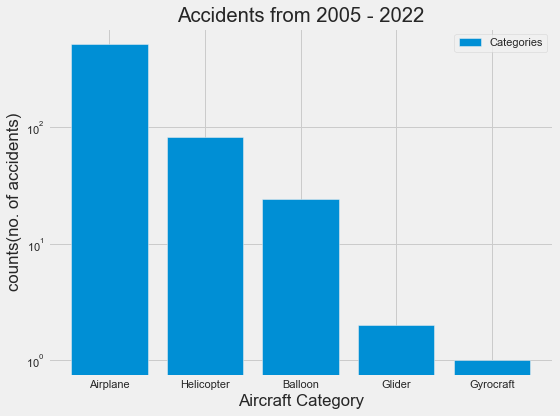

In [104]:
# Again draw a graph for the data frane 2005- present
y = df_Accidents['Aircraft.Category'].value_counts().values.tolist()
x = df_Accidents['Aircraft.Category'].value_counts().index.tolist()

# Plot the bar graph
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize = (8,6))
ax.bar(x, y, label = 'Categories', log = True)

ax.set_title('Accidents from 2005 - 2022')
ax.set_xlabel('Aircraft Category')
ax.set_ylabel('counts(no. of accidents)')

plt.legend()

plt.tight_layout()

plt.show()

The bar graph shows the number of counts of accidents for each category over the period. The Airplane category has the most counts. 
At this point, we'd be quick to prefer the helicopter or other categories as the least risk venture, but each category shows different number of aircrafts, in that category, that have had accidents. 
Each category have subcategories differentiated by the make and the model, go further into each sub-category.
check for the trends of accidents over that time period

In [105]:
# Create a column 'Year' and append to the df_Accidents dataframe
df_Accidents['Year'] = (df_Accidents['Event.Date'].dt.year).copy()
df_Accidents.reset_index(drop=True)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Injury.Severity,...,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Year
0,20050124X00093,Accident,NYC05LA044,2005-01-04,"CLEVELAND, OH",United States,41.565,-81.486111,CGF,Non-Fatal,...,690A,2.0,Turbo Prop,Business,0.583867,0.24362,0.309643,3.000000,VMC,2005
1,20050127X00110,Accident,CHI05CA051,2005-01-09,"HARBOR SPRINGS, MI",United States,45.425556,-84.913333,MGN,Non-Fatal,...,414A,2.0,Reciprocating,Business,0.583867,0.24362,0.309643,5.000000,VMC,2005
2,20050127X00112,Accident,SEA05CA033,2005-01-10,"BILLINGS, MT",United States,45.808611,-108.530834,BIL,Non-Fatal,...,180,1.0,Reciprocating,Business,0.583867,0.24362,0.309643,1.000000,VMC,2005
3,20050118X00063,Accident,ATL05FA043,2005-01-10,"CHARLESTON, SC",United States,32.895277,-80.040555,CHS,Fatal(1),...,PA-30,2.0,Reciprocating,Business,1.000000,0.24362,0.309643,1.388563,VMC,2005
4,20050211X00175,Accident,DEN05CA050,2005-01-19,"LOGAN, UT",United States,41.788333,-111.853333,LGU,Non-Fatal,...,G-1159,2.0,Turbo Jet,Business,0.583867,0.24362,0.309643,9.000000,IMC,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
624,20221109106270,Accident,CEN23FA031,2022-11-09,"Bignell, NE",United States,041453N,1003648W,LBF,Fatal,...,PA46-500TP,1.0,Reciprocating,Business,2.000000,0.00000,0.000000,0.000000,IMC,2022
625,20221115106296,Accident,CEN23LA037,2022-11-15,"Pewaukee, WI",United States,043228N,0881413W,UES,Minor,...,SA227-AT,2.0,Reciprocating,Business,0.000000,2.00000,0.000000,1.000000,IMC,2022
626,20221121106337,Accident,ANC23LA006,2022-11-20,"Bethel, AK",United States,604243N,1614111W,NaN,Non-Fatal,...,207,1.0,Reciprocating,Business,0.000000,0.00000,0.000000,7.000000,VMC,2022
627,20221130106387,Accident,CEN23LA056,2022-11-29,"Batesville, AR",United States,354334N,0913851W,BVX,Minor,...,45,2.0,Reciprocating,Business,0.000000,2.00000,0.000000,6.000000,IMC,2022


In [106]:
# First group by category and years and see the trend over the years
Grouped_category_years = df_Accidents.groupby(['Year', 'Aircraft.Category'])
counts = Grouped_category_years.size()

Group_df = counts.reset_index(name= 'counts') # create a new data frame
Group_df.head()

,Year,Aircraft.Category,counts
0,2005,Airplane,51
1,2005,Balloon,1
2,2005,Helicopter,4
3,2006,Airplane,41
4,2006,Helicopter,6


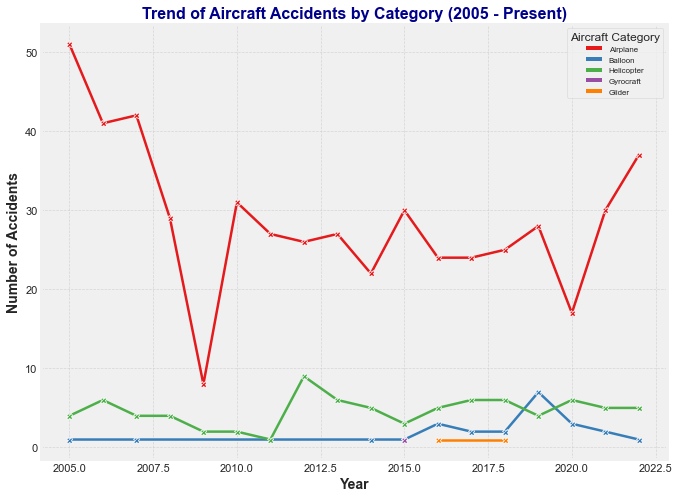

In [107]:
# Now plot to show the trend 
# Import seaborn and matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# set the size to plot on
plt.figure(figsize=(10,8))
# create the plot using searbon and customize
sns.lineplot(data=Group_df, 
             x='Year', 
             y='counts', 
             hue='Aircraft.Category', 
             linewidth=2.5, 
             marker='X',
             palette='Set1'
           )
# Add plot title, customize with fontsizes and color 
plt.title('Trend of Aircraft Accidents by Category (2005 - Present)', 
          fontsize=16, 
          fontweight='bold', 
          color='darkblue')
# label the axes accordingly
plt.xlabel('Year', fontsize=14, fontweight='bold')
plt.ylabel('Number of Accidents', fontsize=14, fontweight='bold')
# Add grid lines
plt.grid(visible=True, linestyle='--', linewidth=0.7, alpha=0.7)
# Include the legend
plt.legend(title='Aircraft Category', loc='upper right', fontsize=8)


From the above line plots, it is evident that over the time the airplane category have had more accidents than 
the other categories; balloon, helicopter and glider.
The helicopter category have more accidents than the balloon.  
In the recent years, the trend of accidents
have increased for the airplanes and is reducing for the balloon and helicopter category. However, the level of scope at
aircraft category does not inform our decision to ditch airplanes for analysis since each category is composed of subcategory aircrafts.
we can further delve into specific sub-categories and do more analysis.

Group the df_Accidents dataframe by aircraft category.Get each category and cross check to see the 'Make' column.

In [108]:
# Access each category by grouping the data by aircraft category.
df_Accidents_Categories = df_Accidents.groupby(['Aircraft.Category'])
counts = df_Accidents_Categories.size()
# reset the index of the dataframe, # create a new data frame
Groups_df = counts.reset_index(name= 'counts') 
Groups_df.head()

,Aircraft.Category,counts
0,Airplane,519
1,Balloon,24
2,Glider,2
3,Gyrocraft,1
4,Helicopter,83


In [109]:
# We can now access each category individually.
# Use the .get_group() method and access each category separately
df_Airplanes = df_Accidents_Categories.get_group('Airplane').copy()
df_Airplanes.reset_index(drop= True)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Injury.Severity,...,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Year
0,20050124X00093,Accident,NYC05LA044,2005-01-04,"CLEVELAND, OH",United States,41.565,-81.486111,CGF,Non-Fatal,...,690A,2.0,Turbo Prop,Business,0.583867,0.24362,0.309643,3.000000,VMC,2005
1,20050127X00110,Accident,CHI05CA051,2005-01-09,"HARBOR SPRINGS, MI",United States,45.425556,-84.913333,MGN,Non-Fatal,...,414A,2.0,Reciprocating,Business,0.583867,0.24362,0.309643,5.000000,VMC,2005
2,20050127X00112,Accident,SEA05CA033,2005-01-10,"BILLINGS, MT",United States,45.808611,-108.530834,BIL,Non-Fatal,...,180,1.0,Reciprocating,Business,0.583867,0.24362,0.309643,1.000000,VMC,2005
3,20050118X00063,Accident,ATL05FA043,2005-01-10,"CHARLESTON, SC",United States,32.895277,-80.040555,CHS,Fatal(1),...,PA-30,2.0,Reciprocating,Business,1.000000,0.24362,0.309643,1.388563,VMC,2005
4,20050211X00175,Accident,DEN05CA050,2005-01-19,"LOGAN, UT",United States,41.788333,-111.853333,LGU,Non-Fatal,...,G-1159,2.0,Turbo Jet,Business,0.583867,0.24362,0.309643,9.000000,IMC,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
514,20221108106258,Accident,ERA23LA050,2022-11-05,"Farmingdale, NY",United States,404417N,0732334W,FRG,Minor,...,B-60,2.0,Reciprocating,Business,0.000000,2.00000,0.000000,0.000000,VMC,2022
515,20221109106270,Accident,CEN23FA031,2022-11-09,"Bignell, NE",United States,041453N,1003648W,LBF,Fatal,...,PA46-500TP,1.0,Reciprocating,Business,2.000000,0.00000,0.000000,0.000000,IMC,2022
516,20221115106296,Accident,CEN23LA037,2022-11-15,"Pewaukee, WI",United States,043228N,0881413W,UES,Minor,...,SA227-AT,2.0,Reciprocating,Business,0.000000,2.00000,0.000000,1.000000,IMC,2022
517,20221121106337,Accident,ANC23LA006,2022-11-20,"Bethel, AK",United States,604243N,1614111W,NaN,Non-Fatal,...,207,1.0,Reciprocating,Business,0.000000,0.00000,0.000000,7.000000,VMC,2022


In [110]:
# Get the shape of the dataframe
df_Airplanes.shape

(519, 23)

The analysis context is 'get the less risky aircrafts,' thus in this time frame, 2005 - 2022, from the each category,
we pick the aircrafts that have had the least number of accidents, then do further analysis in regards
to the number of injuries, fatalities, and the rest. By value counts method, we get to see a rough estimate of those with least number of accidents 

In [111]:
# Get the least value counts
df_Airplanes['Make'].value_counts().tail(20)

Boyd Bruce                        1
Bereznak                          1
Navion                            1
Fairchild                         1
Dassault Falcon                   1
Northrop                          1
Jackson                           1
Boeing                            1
SIAI Marchetti                    1
MKII Corporation                  1
klaas development inc             1
embraer executive aircraft inc    1
schumacher                        1
Evolution 19                      1
Israel Aircraft Industries        1
Diamond Aircraft Ind Inc          1
britten-norman                    1
Rice Leo B                        1
dassault-breguet                  1
Ludwig Larry E                    1
Name: Make, dtype: int64

In [112]:
# Extract a dataframe from the df_Airplanes, that have had only 1 & 2 value counts
Counts = df_Airplanes['Make'].value_counts()
# Set the limit
limit = 2
# Get the  categories less than the limits
limited_Airplanes =Counts[Counts <= limit].index
# filter the df_Airplanes category
df_Airplanes_limited = df_Airplanes[df_Airplanes['Make'].isin(limited_Airplanes)]
df_Airplanes_limited.shape


(90, 23)

In [113]:
# for the new dataframe above, check the total fatalities column
#Check for the value counts of the 
df_Airplanes_limited ['Total.Fatal.Injuries'].value_counts()
# Plot the graphs

0.000000    57
0.583867    15
2.000000     8
1.000000     7
3.000000     2
4.000000     1
Name: Total.Fatal.Injuries, dtype: int64

Now extract the dataframe from the above that have the lowest number of Total.Fatal.Injuries, lowest Total.Serious.Injuries, lowest Total.Minor.Injuries and highest Total.Uninjured. By merging the dataframes, we get a a single dataframe that comprises 
only the safest/ the least risky aircraft in the airplane category.
If the stakeholder is only interested in Airplane, this is the dataframe to be considered.

In [114]:
df_Least_fatalities = df_Airplanes_limited[df_Airplanes_limited['Total.Fatal.Injuries'] < 1]
df_Least_fatalities.reset_index(drop= True)

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Injury.Severity,...,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Year
0,20050211X00175,Accident,DEN05CA050,2005-01-19,"LOGAN, UT",United States,41.788333,-111.853333,LGU,Non-Fatal,...,G-1159,2.0,Turbo Jet,Business,0.583867,0.24362,0.309643,9.0,IMC,2005
1,20050510X00586,Accident,DFW05LA117,2005-05-09,"BROWNWOOD, TX",United States,31.793611,-98.956389,BWD,Non-Fatal,...,NA-265-80,2.0,Turbo Fan,Business,0.583867,0.24362,0.309643,5.0,VMC,2005
2,20050701X00917,Accident,DEN05LA102,2005-06-29,"SCOFIELD, UT",United States,NaN,NaN,NaN,Non-Fatal,...,480B,1.0,Turbo Prop,Business,0.583867,0.24362,0.309643,2.0,VMC,2005
3,20050816X01251,Accident,DEN05LA123,2005-08-07,"ALBUQUERQUE, NM",United States,35.403611,-106.615278,ABQ,Non-Fatal,...,Rutan Long EZE,1.0,Reciprocating,Business,0.583867,0.24362,0.309643,1.0,VMC,2005
4,20050831X01342,Accident,IAD05LA122,2005-08-12,"SAULSVILLE, WV",United States,37.652222,-81.45,NaN,Non-Fatal,...,280C,1.0,Reciprocating,Business,0.583867,1.00000,0.309643,1.0,VMC,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,20220726105587,Accident,WPR22LA272,2022-07-13,"Scappoose, WA",United States,454616N,1225143W,SPB,Non-Fatal,...,PA-60-601P,2.0,Reciprocating,Business,0.000000,0.00000,0.000000,1.0,VMC,2022
68,20220804105665,Accident,WPR22LA290,2022-08-03,"Carlsbad, NM",United States,032201N,1041541W,CNM,Non-Fatal,...,TBM 700,1.0,Reciprocating,Business,0.000000,0.00000,0.000000,3.0,NaN,2022
69,20220822105776,Accident,ERA22LA379,2022-08-20,"Bealeton, VA",United States,038338N,0774255W,3VA3,Minor,...,A75N1,1.0,Reciprocating,Business,0.000000,2.00000,0.000000,2.0,VMC,2022
70,20221004106055,Accident,CEN23LA003,2022-10-03,"Houston, TX",United States,293844N,0951642W,HOU,Non-Fatal,...,EMB-545,2.0,Reciprocating,Business,0.000000,0.00000,0.000000,4.0,VMC,2022


In [115]:
df_Airplanes_limited ['Total.Serious.Injuries'].value_counts()

0.00000    56
0.24362    16
1.00000    10
2.00000     5
4.00000     2
3.00000     1
Name: Total.Serious.Injuries, dtype: int64

In [116]:
# Just as for the total fatalities extract for those least injuries
df_Least_Serious_Injuries = df_Airplanes_limited[df_Airplanes_limited['Total.Serious.Injuries'] < 1]
df_Least_Serious_Injuries

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Injury.Severity,...,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Year
3118,20050211X00175,Accident,DEN05CA050,2005-01-19,"LOGAN, UT",United States,41.788333,-111.853333,LGU,Non-Fatal,...,G-1159,2.0,Turbo Jet,Business,0.583867,0.24362,0.309643,9.0,IMC,2005
3136,20050510X00586,Accident,DFW05LA117,2005-05-09,"BROWNWOOD, TX",United States,31.793611,-98.956389,BWD,Non-Fatal,...,NA-265-80,2.0,Turbo Fan,Business,0.583867,0.24362,0.309643,5.0,VMC,2005
3142,20050701X00917,Accident,DEN05LA102,2005-06-29,"SCOFIELD, UT",United States,NaN,NaN,NaN,Non-Fatal,...,480B,1.0,Turbo Prop,Business,0.583867,0.24362,0.309643,2.0,VMC,2005
3151,20050816X01251,Accident,DEN05LA123,2005-08-07,"ALBUQUERQUE, NM",United States,35.403611,-106.615278,ABQ,Non-Fatal,...,Rutan Long EZE,1.0,Reciprocating,Business,0.583867,0.24362,0.309643,1.0,VMC,2005
3161,20051003X01562,Accident,NYC05LA145,2005-09-22,"COLUMBUS, OH",United States,40.079723,-83.072778,OSU,Non-Fatal,...,BK-117-B2,2.0,Turbo Shaft,Business,0.583867,0.24362,0.309643,5.0,VMC,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3701,20220222104672,Accident,CEN22LA126,2022-02-18,"Detroit, MI",United States,042256N,0008310W,DET,Non-Fatal,...,EMB-500,2.0,Turbo Jet,Business,0.000000,0.00000,0.000000,1.0,VMC,2022
3718,20220608105217,Accident,WPR22LA201,2022-06-07,"Hawthorne, CA",United States,335520N,0118203W,KHHR,Non-Fatal,...,BD100 1A10,2.0,Turbo Shaft,Business,0.000000,0.00000,0.000000,11.0,VMC,2022
3720,20220726105587,Accident,WPR22LA272,2022-07-13,"Scappoose, WA",United States,454616N,1225143W,SPB,Non-Fatal,...,PA-60-601P,2.0,Reciprocating,Business,0.000000,0.00000,0.000000,1.0,VMC,2022
3725,20220804105665,Accident,WPR22LA290,2022-08-03,"Carlsbad, NM",United States,032201N,1041541W,CNM,Non-Fatal,...,TBM 700,1.0,Reciprocating,Business,0.000000,0.00000,0.000000,3.0,NaN,2022


In [117]:
#Check for the minor injuries
df_Airplanes_limited ['Total.Minor.Injuries'].value_counts()

0.000000    62
0.309643    17
1.000000     6
2.000000     5
Name: Total.Minor.Injuries, dtype: int64

In [118]:
# Exract the data frame with least number of minor injuries
df_Least_Minor_Injuries = df_Airplanes_limited[df_Airplanes_limited['Total.Minor.Injuries'] < 1]
df_Least_Minor_Injuries.shape

(79, 23)

For the total uninjured column, find the the one with maximum number of 'Uninjured'
for this column, the higher the number of uninjured, the safer the aircraft and hence the less risky it is.

In [119]:
df_Airplanes_limited ['Total.Uninjured'].value_counts()

0.000000     33
1.000000     26
2.000000     12
5.000000      4
1.388563      3
3.000000      3
4.000000      2
7.000000      2
9.000000      2
11.000000     1
8.000000      1
12.000000     1
Name: Total.Uninjured, dtype: int64

In [120]:
# Get the dataframe for those  that had highest number of uninjured, consider higher numbers
df_Total_Uninjured = df_Airplanes_limited[df_Airplanes_limited['Total.Uninjured'] >= 10]
df_Total_Uninjured

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Injury.Severity,...,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Year
3238,20080206X00140,Accident,CHI07LA317,2007-07-17,"Custer, SD",United States,NaN,NaN,NaN,Non-Fatal,...,S81A,1.0,Reciprocating,Business,0.583867,1.0,0.309643,12.0,VMC,2007
3718,20220608105217,Accident,WPR22LA201,2022-06-07,"Hawthorne, CA",United States,335520N,0118203W,KHHR,Non-Fatal,...,BD100 1A10,2.0,Turbo Shaft,Business,0.000000,0.0,0.000000,11.0,VMC,2022


Now concatenate the data frames and remove the duplicates. 
Now we have a dataframe for the aircrafts under the airplane  category that are least risky
with this data frame we now can plot to see which is the most preferable in this category.

In [121]:
# Now add all the above dataframes together and remove duplicates
df_Airplanes_FS = pd.concat([df_Least_fatalities, df_Least_Serious_Injuries, df_Least_Minor_Injuries, df_Total_Uninjured ], axis=0, ignore_index=True).drop_duplicates()
df_Airplanes_FS.shape
# Display the dataframe
df_Airplanes_FS

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Injury.Severity,...,Model,Number.of.Engines,Engine.Type,Purpose.of.flight,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Year
0,20050211X00175,Accident,DEN05CA050,2005-01-19,"LOGAN, UT",United States,41.788333,-111.853333,LGU,Non-Fatal,...,G-1159,2.0,Turbo Jet,Business,0.583867,0.24362,0.309643,9.0,IMC,2005
1,20050510X00586,Accident,DFW05LA117,2005-05-09,"BROWNWOOD, TX",United States,31.793611,-98.956389,BWD,Non-Fatal,...,NA-265-80,2.0,Turbo Fan,Business,0.583867,0.24362,0.309643,5.0,VMC,2005
2,20050701X00917,Accident,DEN05LA102,2005-06-29,"SCOFIELD, UT",United States,NaN,NaN,NaN,Non-Fatal,...,480B,1.0,Turbo Prop,Business,0.583867,0.24362,0.309643,2.0,VMC,2005
3,20050816X01251,Accident,DEN05LA123,2005-08-07,"ALBUQUERQUE, NM",United States,35.403611,-106.615278,ABQ,Non-Fatal,...,Rutan Long EZE,1.0,Reciprocating,Business,0.583867,0.24362,0.309643,1.0,VMC,2005
4,20050831X01342,Accident,IAD05LA122,2005-08-12,"SAULSVILLE, WV",United States,37.652222,-81.45,NaN,Non-Fatal,...,280C,1.0,Reciprocating,Business,0.583867,1.00000,0.309643,1.0,VMC,2005
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,20170717X15023,Accident,WPR17FA155,2017-07-17,"Mesa, AZ",United States,033289N,1114247W,FFZ,Fatal,...,Lancair Evolution,1.0,Turbo Prop,Business,2.000000,0.00000,0.000000,0.0,VMC,2017
127,20180530X50125,Accident,WPR18FA155,2018-05-30,"Melville, NY",United States,040466N,0732325W,FRG,Fatal,...,SNJ 2,1.0,Reciprocating,Business,1.000000,0.00000,0.000000,0.0,VMC,2018
133,20200729X52602,Accident,WPR20LA244,2020-07-29,"Pioche, NV",United States,375512N,1143224W,NaN,Fatal,...,AS350,1.0,Reciprocating,Business,2.000000,0.00000,0.000000,0.0,VMC,2020
135,20200828X11258,Accident,ERA20LA297,2020-08-28,"Pembroke Park, FL",United States,255940N,0801015W,NaN,Fatal,...,500,2.0,Reciprocating,Business,2.000000,0.00000,0.000000,0.0,VMC,2020


In [122]:
# Check for the value counts of the concatenated dataframe
df_Airplanes_FS['Engine.Type'].value_counts()

Reciprocating    63
Turbo Prop       11
Turbo Fan         9
Turbo Jet         4
Turbo Shaft       2
Electric          1
Name: Engine.Type, dtype: int64

In [123]:
# Check for the shape of the new dataframe
df_Airplanes_FS.shape #shape

(90, 23)


The best best recommendation of aircraft in the airplane category will be the one with relatively high Total.Uninjured
and be with the least number of total fatalities, total injuries and least minor injuries.
By considering the highest five, from the total uninjured plot, and checking them through the other plots,
I would come to conclude that the least riky aircrafts in the airplane category, and ordered from the most recommended to the least are:
1.Bombadier
2.Dassault Falcon
3.Israel Aircraft Industries
4.Embraer
